In [1]:
import os
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt



def analyze_pdfs(directory):
    """
    Walk through all subfolders in 'directory', analyze each PDF:
    - count pages
    - count words
    - count images
    - count tables
    Handles corrupt or unreadable PDFs gracefully.
    Returns a pandas DataFrame with statistics and plots summary graphs.
    """
    records = []
    errors = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith('.pdf'):
                path = os.path.join(root, file)
                rel_path = os.path.relpath(path, directory)
                try:
                    with pdfplumber.open(path) as pdf:
                        num_pages = len(pdf.pages)
                        total_words = 0
                        total_images = 0
                        total_tables = 0

                        for page_num, page in enumerate(pdf.pages, start=1):
                            try:
                                text = page.extract_text() or ""
                                total_words += len(text.split())
                                total_images += len(page.images)
                                total_tables += len(page.extract_tables())
                            except Exception as pe:
                                # Skip problematic page
                                print(f"Warning: couldn't parse page {page_num} of {rel_path}: {pe}")

                    records.append({
                        'file': rel_path,
                        'pages': num_pages,
                        'words': total_words,
                        'images': total_images,
                        'tables': total_tables,
                        'error': None
                    })
                except Exception as e:
                    # Log error and continue
                    print(f"Error: couldn't open or process '{rel_path}': {e}")
                    errors.append((rel_path, str(e)))
                    records.append({
                        'file': rel_path,
                        'pages': None,
                        'words': None,
                        'images': None,
                        'tables': None,
                        'error': str(e)
                    })

    df = pd.DataFrame(records)
    if df.empty:
        print("No PDF files found in the specified directory.")
        return df

    # Report any errors
    if errors:
        print(f"Encountered errors in {len(errors)} files:")
        for fp, err in errors:
            print(f" - {fp}: {err}")

    # Display basic statistics for successfully parsed PDFs
    stats = df[df['error'].isnull()][['pages', 'words', 'images', 'tables']]
    print("PDF Analysis Summary (successful files):")
    print(stats.describe())

    # Plot histograms for each metric
    metrics = ['pages', 'words', 'images', 'tables']
    for metric in metrics:
        plt.figure()
        stats[metric].dropna().hist(bins=10)
        plt.title(f'Distribution of {metric.capitalize()} per PDF')
        plt.xlabel(metric.capitalize())
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

    # Plot a scatter of words vs pages
    plt.figure()
    plt.scatter(stats['pages'], stats['words'], alpha=0.7)
    plt.title('Words vs Pages')
    plt.xlabel('Pages')
    plt.ylabel('Words')
    plt.tight_layout()
    plt.show()

    return df




Error: couldn't open or process 'alarms-buzzers-and-sirens/cem-1201-42-/cem-1201-42-.pdf': Unexpected EOF
Encountered errors in 1 files:
 - alarms-buzzers-and-sirens/cem-1201-42-/cem-1201-42-.pdf: Unexpected EOF
PDF Analysis Summary (successful files):
            pages          words       images       tables
count  752.000000     752.000000   752.000000   752.000000
mean     5.102394    1371.484043    18.134309    14.187500
std     25.407127   14375.337878   111.085813   166.432188
min      1.000000       0.000000     0.000000     0.000000
25%      1.000000     242.000000     2.000000     1.000000
50%      2.000000     418.000000     3.000000     4.000000
75%      5.000000     603.250000     8.000000     8.000000
max    656.000000  385859.000000  2779.000000  4506.000000


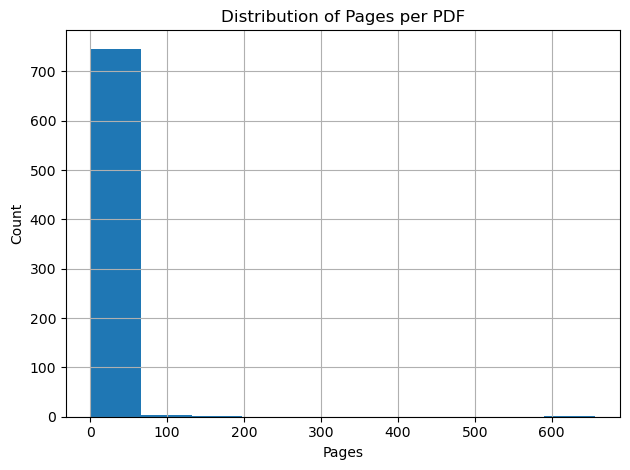

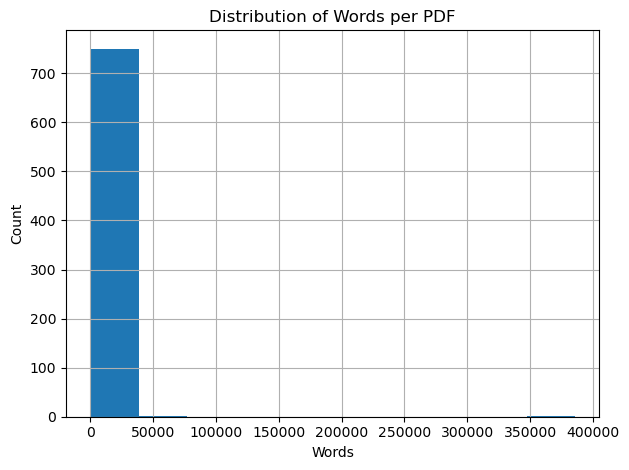

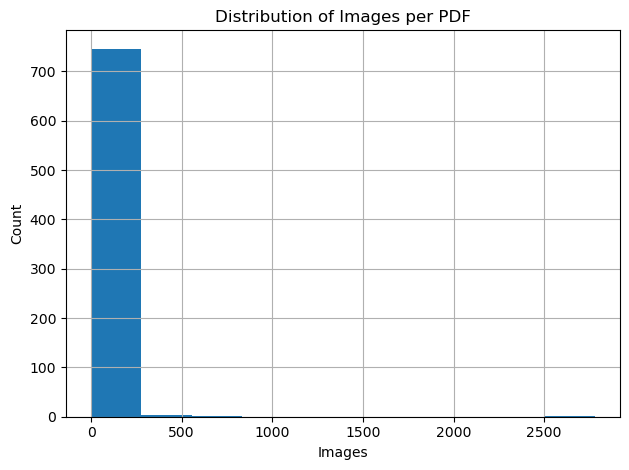

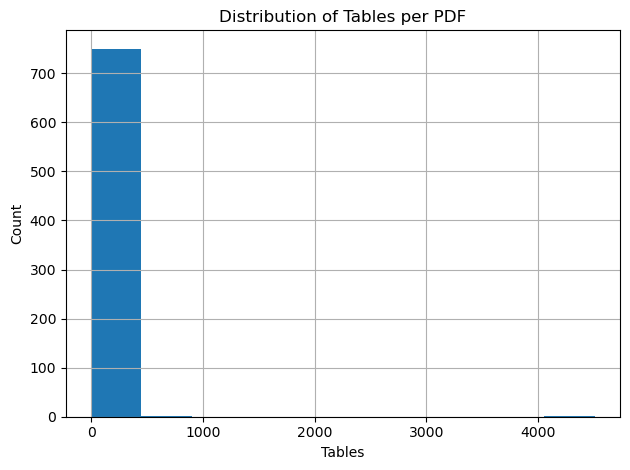

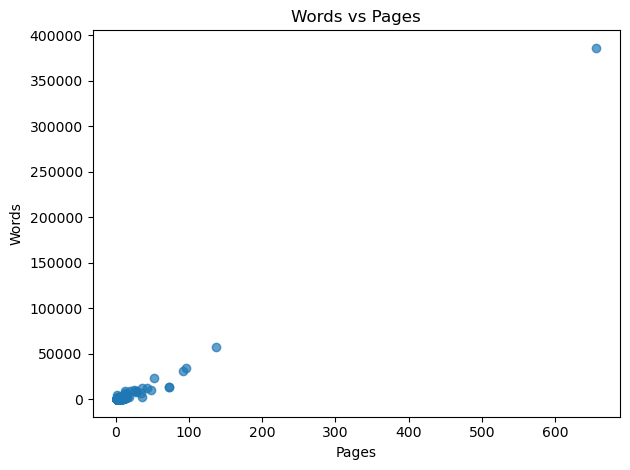

,file,pages,words,images,tables,error
0,alarms-buzzers-and-sirens/cmt-13031-smt-tr/cmt...,4.0,610.0,264.0,5.0,None
1,alarms-buzzers-and-sirens/css-i4b20-smt-tr/css...,4.0,634.0,1.0,6.0,None
2,alarms-buzzers-and-sirens/AT-1224-TWT-12V-2-R/...,5.0,453.0,8.0,3.0,None
3,alarms-buzzers-and-sirens/cc-0601/cc-0601.pdf,3.0,424.0,2.0,3.0,None
4,alarms-buzzers-and-sirens/cem-1201-42-/cem-120...,NaN,NaN,NaN,NaN,Unexpected EOF
...,...,...,...,...,...,...
748,controller-accesories/DELTA_IA-TC_DTB_OM_EN_20...,13.0,6222.0,273.0,38.0,None
749,controller-accesories/e145023ac513ab7a8633a15e...,2.0,396.0,8.0,0.0,None
750,controller-accesories/e1bc23b6b1f102bc6809deab...,3.0,871.0,3.0,3.0,None
751,controller-accesories/e31e335aa360e3072b98cbbd...,2.0,394.0,7.0,0.0,None


In [2]:
analyze_pdfs("../02-data/00-testing")